# Colossus tutorial on HMF using exam text example

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Imposto la cosmologia a partire dai parametri suggeriti dal testo del problema.

In [8]:
from colossus.cosmology import cosmology
params = {'flat': True, 'H0': 67.7, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.96}
cosmology.addCosmology('myCosmo', params)
cosmo = cosmology.setCosmology('myCosmo')

Traccio il grafico della HMF come suggerito nel testo del problema a partire dai dati forniti.

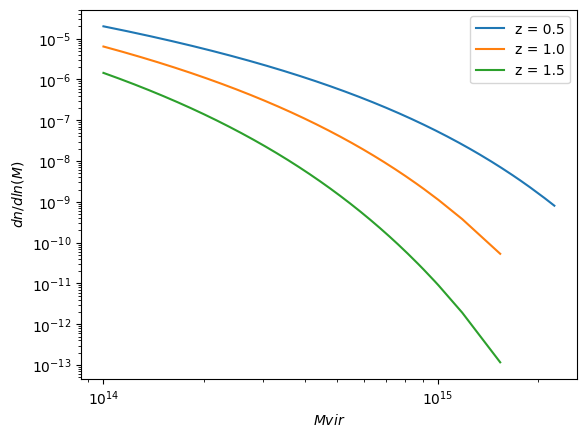

In [58]:
from colossus.lss import mass_function

z = [0.506, 1.019, 1.500]
M = [0, 0, 0]
euclid_clusters = pd.read_csv('euclid_clusters.csv')
M[0] = np.sort(euclid_clusters['mass'].iloc[:168897])
M[1] = np.sort(euclid_clusters['mass'].iloc[168897:310904])
M[2] = np.sort(euclid_clusters['mass'].iloc[168897:310904])

plt.figure()
plt.xlabel('$Mvir$')
plt.ylabel('$dn/dln(M)$')
plt.loglog()
for i in range(len(z)):
    mfunc = mass_function.massFunction(M[i], z[i], mdef = 'vir', 
                                       model = 'despali16', q_out = 'dndlnM')
    plt.plot(M[i], mfunc, label = 'z = %.1f' % (z[i]))
plt.legend()
plt.show()